In [1]:
from analyticsmeth.__imports__ import *
import analyticsmeth.analyticsmeth as am

In [2]:
def Chung_Reynolds_2_dim_func(xgrid, ygrid):
    
    '''
    Chung Reynolds 2 dim function.
    
    X     :2 dim vector.
    '''
    
    return (xgrid + ygrid)**2

print("min f(x): ", Chung_Reynolds_2_dim_func(0,0))

min f(x):  0


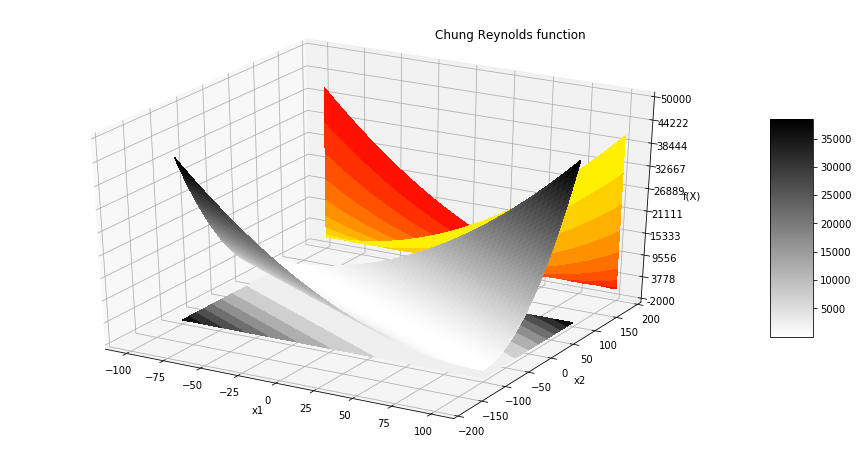

In [3]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection="3d")

#Make data:
xgrid = np.arange(-100,100,0.1)
ygrid = np.arange(-100,100,0.1)
xgrid, ygrid = np.meshgrid(xgrid, ygrid)
Z = (xgrid + ygrid)**2

#Plot the surface:
surf = ax.plot_surface(xgrid, ygrid, Z, cmap = cm.binary, linewidth = 0, antialiased = False)
cset = ax.contourf(xgrid, ygrid, Z, zdir='z', offset = -2000, cmap=cm.binary)
cset = ax.contourf(xgrid, ygrid, Z, zdir='y', offset = 200, cmap=cm.autumn)

#Customize the z axis:
ax.set_ylim(-200, 200)
ax.set_zlim(-2000, 50000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.0f'))

#Add a color bar which maps values to colors:
fig.colorbar(surf, shrink = 0.5, aspect = 5)

ax.set_zlabel("f(X)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Chung Reynolds function", x = 0.7)

plt.show()

In [4]:
range_of_X = list([-100,100])

<class 'matplotlib.contour.QuadContourSet'>


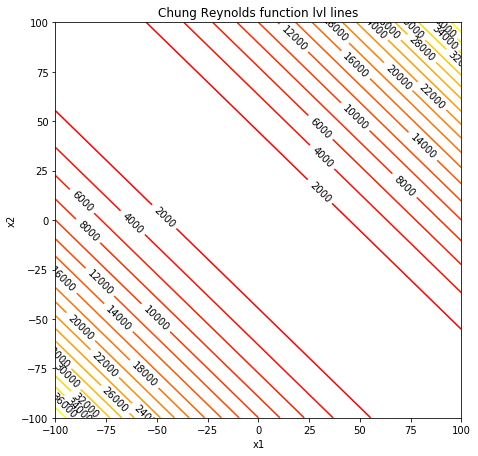

In [5]:
#lvl lines:

xgrid, ygrid, zgrid = am.MKData(Chung_Reynolds_2_dim_func, range_of_X)

fig = plt.figure(figsize = (16,16))

#20 - count of regions between the values of min and max.
ax1 = plt.subplot(221)
cs = ax1.contour(xgrid, ygrid, zgrid, 20, cmap = cm.autumn)
print(type(cs))
#colors = "#000000" for black labels
cs.clabel(colors = "#000000", fmt = "%0.0f")

ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Chung Reynolds function lvl lines")

plt.show()

# Gradien descent with fixed step

In [6]:
train = pd.read_csv("../data_fixedgd/CHR_data_fixed.txt", sep = ';',
                    names = ["dim", "id", "step", "iter_count", "acc"])
print(train.head())

   dim  id  step  iter_count       acc
0    1   3  0.98           1  0.000001
1    1   3  0.96           1  0.000001
2    1   3  0.94           1  0.000001
3    1   3  0.92           1  0.000001
4    1   3  0.90           1  0.000001


In [7]:
fc_f, bc_f, gc_f, os_f = am.fixedgd_analytics_2dim(train)

< ---- Сходимость ---- >
Кол-во комбинаций (начальная точка - шаг), где метод не разошелся: 90
Общее кол-во испытаний (начальная точка - шаг): 4900


< ---- Итерации ---- >
Минимальное кол-во итераций: 1
Среднее кол-во итераций: 215.2
Максимальное кол-во итераций: 1000


< ---- Точность ---- >
Максимальная точность: 0.0
Средняя точность: 9.621222222222223e-06
Минимальная точность: 3.866e-05


< ---- Для всех данных ---- >
< ---- Шаг - количество точек - итерации(min, mean, max) - точность(min, mean, max) ---- >
Шаги:
[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]


Количество точек, в которых метод не разошелся:
[10.  7.  5.  5.  4.  4.  4.  3.  2.  2.  2.  2.  2.  2.  2.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1

/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:143: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not(train[train.loc[:,"step"] == step][train.loc[:,"id"] == idd]["iter_count"].empty):
/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:144: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if train[train.loc[:,"step"] == step][train.loc[:,"id"] == idd]["iter_count"].values[0] == 1000:


< ---- Шаг - количество точек (не сходятся) - количество точек (расходятся) ---- >
Шаги:
[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]


Количество точек, в которых метод не сошелся:
[9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


Количество точек, в которых метод разошелся:
[90. 93. 95. 95. 96. 96. 96. 97. 98. 98. 98. 98. 98. 98. 98. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.
 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99. 99.]


Нет шагов, где метод сходится для 100% точек!


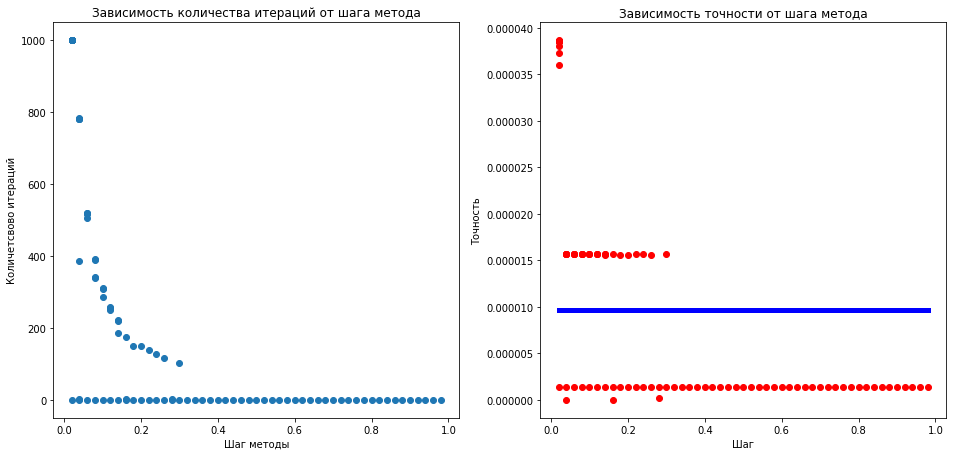

Красным на правом графике выделены точки, где точность достигла треубемого значения


/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:314: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y.append(len(train_filtered[train_filtered.loc[:,"step"] == _][train_filtered.loc[:,"iter_count"] < 1000]))


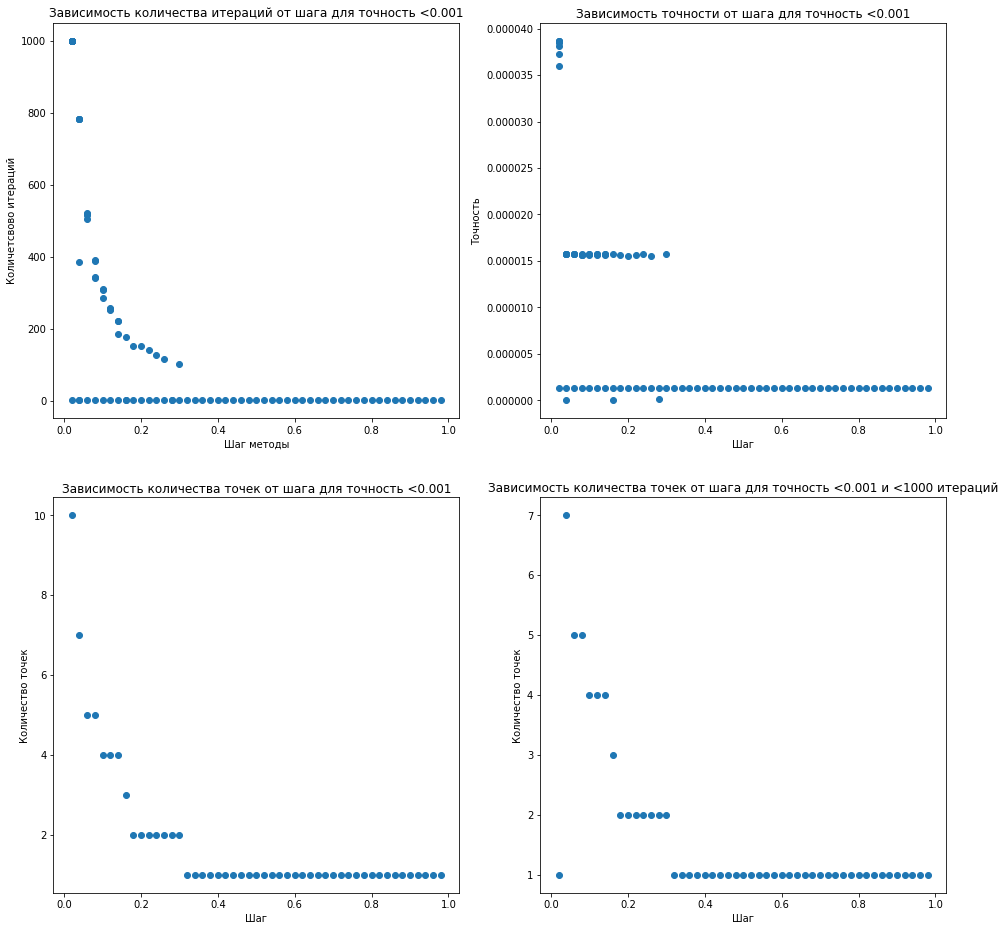

In [8]:
am.fixedgd_analytics_plots_2dim(train,gc_f)

In [9]:
train_anim = pd.read_csv("../anim_fixedgd/CHR_anim_fixedgd.txt", sep = ';',
                    names = ["id", "x1", "x2", "y",
                             "step", "iter", "acc"])
print(train_anim.head())

    id            x1            x2             y  step  iter           acc
0    1  8.093062e+01      0.904579  4.291014e+07  0.98   1.0  4.291014e+07
1    1 -2.078079e+06 -23227.132752  1.865333e+25  0.98   2.0  1.865333e+25
2  404           NaN           NaN           NaN   NaN   NaN           NaN
3    1  8.093062e+01      0.904579  4.291014e+07  0.96   1.0  4.291014e+07
4    1 -2.035667e+06 -22753.091174  1.717654e+25  0.96   2.0  1.717654e+25


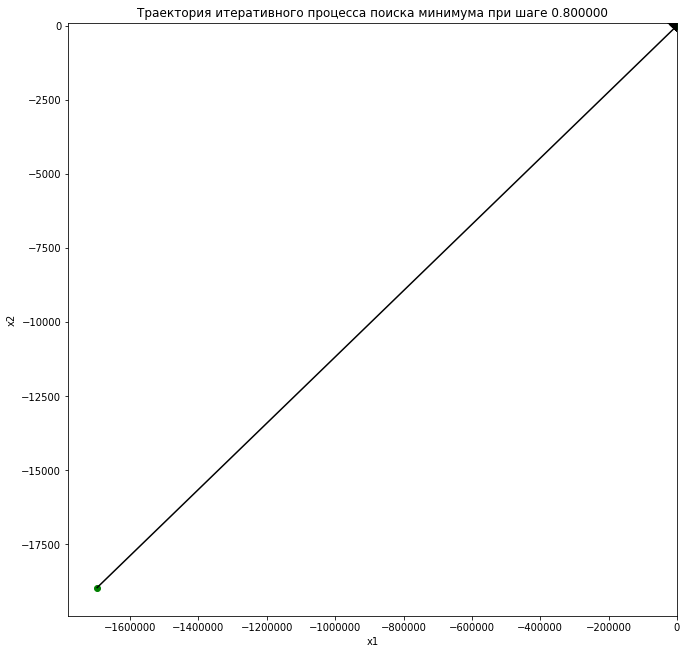

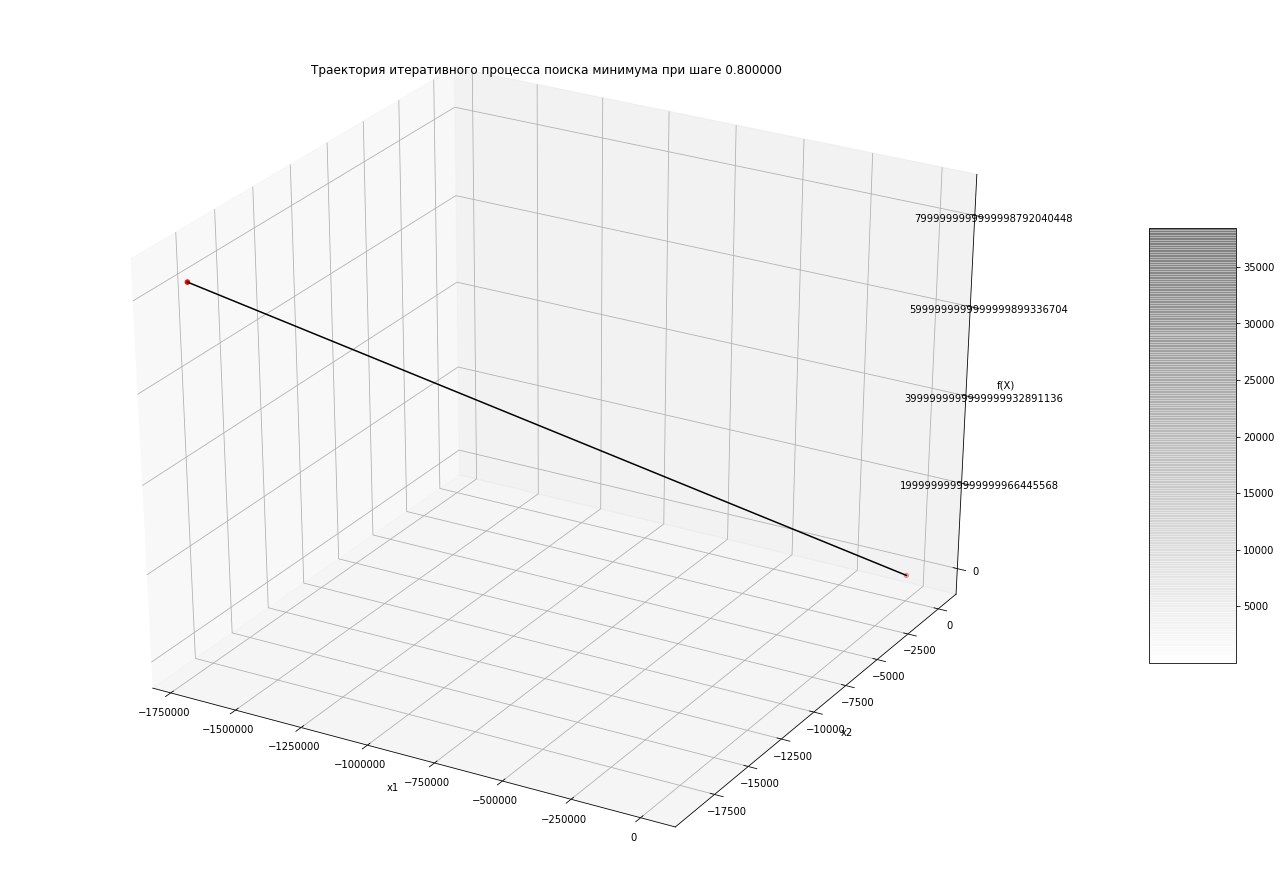

In [10]:
am.path_of_fixedgd(train_anim, gc_f, os_f, Chung_Reynolds_2_dim_func, [-100,100], 1)

/Users/gtmartem/Documents/dev/.virtualenvs/GRADDESCENT/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Оптимальный шаг: 0.5868572137015498


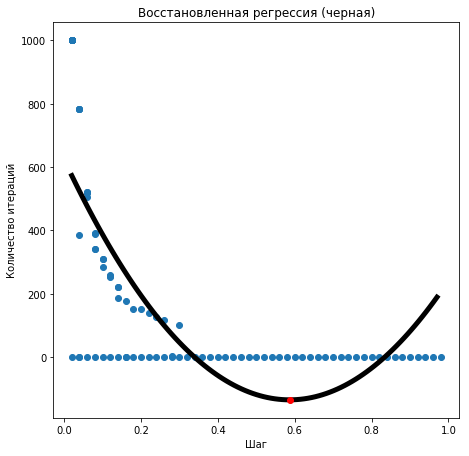

In [11]:
lr, opti_step = am.iter_step_dep(train.loc[:,"step"].values, train.loc[:,"iter_count"].values)
print("Оптимальный шаг:", opti_step)

# Adaptive gradient descent

In [2]:
train = pd.read_csv("../data_adaptivegd/CHR_data_adaptive.txt", sep = ';',
                    names = ["dim", "id", "step", "p1", "p2", 
                             "iter_count", "acc"])
print(train.head())

   dim  id  step    p1   p2  iter_count       acc
0    1   1   0.5  1.25  0.2          54  0.000014
1    1   1   0.5  1.25  0.4          59  0.000014
2    1   1   0.5  1.25  0.6          63  0.000011
3    1   1   0.5  1.25  0.8          81  0.000014
4    1   1   0.5  1.50  0.2          35  0.000013


In [13]:
train = train[train.loc[:,"dim"] == 2]
fc_p, bc_p, gc_p, op_p, opd_p = am.adaptivegd_analytics_2dim(train, logging=True)

< ---- Сходимость ---- >
Кол-во комбинаций (начальная точка - параметры), где метод не разошелся: 2400
Общее кол-во испытаний (начальная точка - параметры): 2400


< ---- Итерации ---- >
Минимальное кол-во итераций: 12
Среднее кол-во итераций: 47.94291666666667
Максимальное кол-во итераций: 135


< ---- Точность ---- >
Максимальная точность: 0.0
Средняя точность: 1.3323349999999998e-05
Минимальная точность: 1.574e-05




/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:644: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_count.loc[p2,p1] = len(train[train.loc[:,"p1"] == p1][train.loc[:,"p2"] == p2].values)
/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:645: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iter_min.loc[p2,p1] = train[train.loc[:,"p1"] == p1][train.loc[:,"p2"] == p2]["iter_count"].values.min()
/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:646: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iter_mean.loc[p2,p1] = train[train.loc[:,"p1"] == p1][train.loc[:,"p2"] == p2]["iter_count"].values.mean()
/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/proce

< ---- Для всех данных ---- >
< ---- Количество точек - итерации(min, mean, max) - точность(min, mean, max) ---- >
Количество точек, в которых метод не разошелся:
[[100 100 100 100 100 100]
 [100 100 100 100 100 100]
 [100 100 100 100 100 100]
 [100 100 100 100 100 100]]


Минимум итераций для пары параметров:
[[46 30 24 22 20 19]
 [12 33 27 25 23 22]
 [56 39 34 31 21 22]
 [69 55 50 51 47 49]]


Среднее количество итераций для пары параметров:
[[59.84 38.79 31.15 27.48 25.46 23.6]
 [62.37 42.4 35.06 31.57 28.95 28.07]
 [69.83 49.11 42.4 38.83 36.73 35.41]
 [90.76 71.35 65.55 66.42 66.91 82.59]]


Максимальное количество итераций для пары параметров:
[[71 45 36 32 29 27]
 [69 46 38 34 31 34]
 [79 55 51 43 44 42]
 [109 86 84 104 111 135]]


Максимальная точность для пары параметров:
[[1.187e-05 1.278e-05 1.263e-05 1.172e-05 1.135e-05 1.162e-05]
 [4e-08 1.196e-05 1.185e-05 1.139e-05 1.253e-05 1.134e-05]
 [1.136e-05 1.216e-05 1.151e-05 1.176e-05 1.48e-06 8.86e-06]
 [1.361e-05 1.143e-05 1.1

/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:684: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if train[train.loc[:,"p1"] == p1][train.loc[:,"p2"] == p2][train.loc[:,"id"] == idd]["iter_count"].values == 1000:


< ---- Количество точек (не сходятся) - количество точек (расходятся) ---- >
Количество точек, в которых метод не сошелся:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


Количество точек, в которых метод разошелся:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]




/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:714: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if train[train.loc[:,"p1"] == p1][train.loc[:,"p2"] == p2][train.loc[:,"id"] == idd]["iter_count"].values < 1000 and \
/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:715: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (len(train[train.loc[:,"p1"] == p1][train.loc[:,"p2"] == p2]["id"]) == 100):
/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:717: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iter_min.loc[p2,p1] = train[train.loc[:,"p1"] == p1][train.loc[:,"p2"] == p2]["iter_count"].values.min()
/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processin

< ---- Для всех данных ---- >
< ---- Количество точек - итерации(min, mean, max) - точность(min, mean, max) ---- >
Параметры, в которых метод сходится 100% для пары параметров:
[[100 100 100 100 100 100]
 [100 100 100 100 100 100]
 [100 100 100 100 100 100]
 [100 100 100 100 100 100]]


Минимум итераций для пары параметров:
[[46 30 24 22 20 19]
 [12 33 27 25 23 22]
 [56 39 34 31 21 22]
 [69 55 50 51 47 49]]


Среднее количество итераций для пары параметров:
[[59.84 38.79 31.15 27.48 25.46 23.6]
 [62.37 42.4 35.06 31.57 28.95 28.07]
 [69.83 49.11 42.4 38.83 36.73 35.41]
 [90.76 71.35 65.55 66.42 66.91 82.59]]


Максимальное количество итераций для пары параметров:
[[71 45 36 32 29 27]
 [69 46 38 34 31 34]
 [79 55 51 43 44 42]
 [109 86 84 104 111 135]]


Максимальная точность для пары параметров:
[[1.187e-05 1.278e-05 1.263e-05 1.172e-05 1.135e-05 1.162e-05]
 [4e-08 1.196e-05 1.185e-05 1.139e-05 1.253e-05 1.134e-05]
 [1.136e-05 1.216e-05 1.151e-05 1.176e-05 1.48e-06 8.86e-06]
 [1.361e-05

/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:756: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p1 = train.loc[train[train.loc[:,"id"] == idd][train.loc[:,"iter_count"] == miniter].index[0],"p1"]
/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:757: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p2 = train.loc[train[train.loc[:,"id"] == idd][train.loc[:,"iter_count"] == miniter].index[0],"p2"]
/Users/gtmartem/Documents/dev/GitHub/graddes/grad2.0/processing_of_data/processing_of_data/analyticsmeth/analyticsmeth.py:761: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  opti_acc = np.append(opti_acc, [train.loc[train[train.loc[:,"id"] == idd][train.loc[:,"iter_count"] == miniter].index[0],"acc"]])


< ---- Оптимальные параметры ---- >
< ---- Id - параметры - количество итераций - точность ---- >
Оптимальные параметры
      p1   p2
0   2.50  0.2
1   2.50  0.2
2   2.50  0.2
3   2.50  0.2
4   2.50  0.2
5   2.50  0.2
6   2.50  0.2
7   2.50  0.2
8   2.50  0.2
9   2.50  0.2
10  2.50  0.2
11  2.50  0.2
12  2.50  0.2
13  2.50  0.2
14  2.50  0.2
15  2.50  0.2
16  2.50  0.2
17  2.25  0.2
18  2.50  0.6
19  2.50  0.2
20  2.50  0.2
21  2.50  0.2
22  2.50  0.2
23  2.50  0.2
24  2.50  0.2
25  2.50  0.2
26  2.50  0.2
27  2.50  0.2
28  2.50  0.2
29  1.25  0.4
30  2.50  0.2
31  2.50  0.2
32  2.50  0.2
33  2.50  0.2
34  2.50  0.2
35  2.50  0.2
36  2.50  0.2
37  2.50  0.2
38  2.50  0.2
39  2.50  0.2
40  1.25  0.4
41  2.50  0.2
42  2.50  0.2
43  2.50  0.2
44  2.50  0.2
45  2.50  0.2
46  2.50  0.2
47  2.50  0.2
48  2.50  0.2
49  2.50  0.2
      p1   p2
50  2.50  0.2
51  2.50  0.2
52  2.50  0.2
53  2.50  0.2
54  2.50  0.2
55  2.50  0.2
56  2.50  0.2
57  2.50  0.2
58  2.50  0.2
59  2.25  0.6
60  2.50  0.

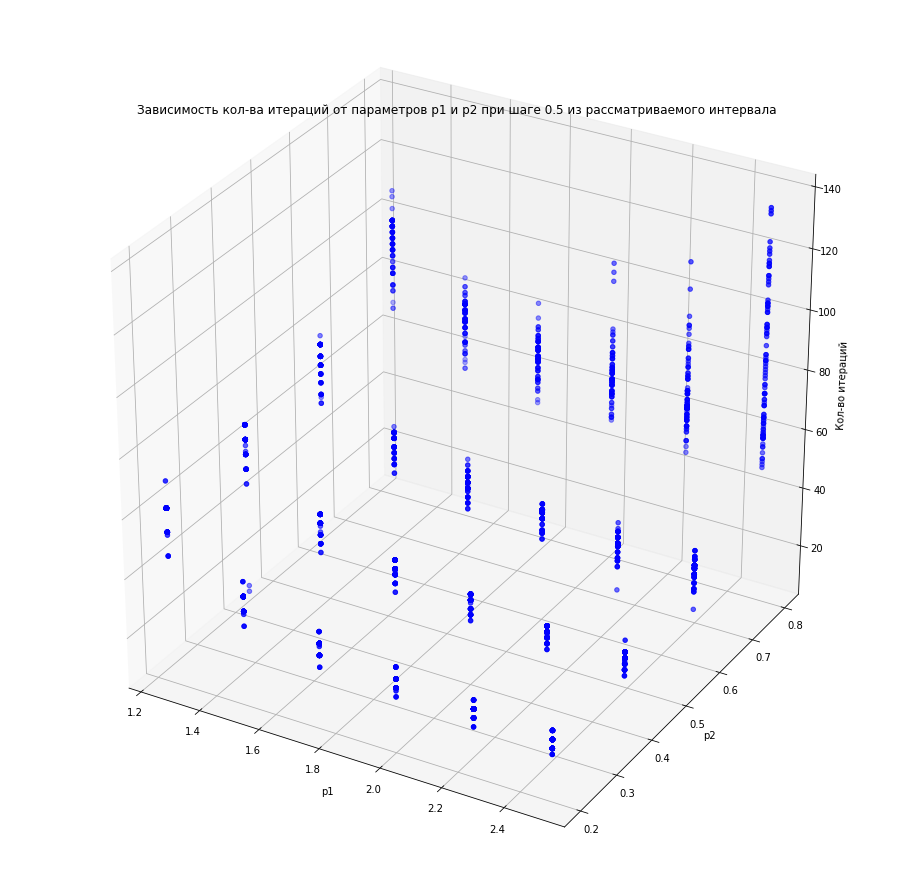

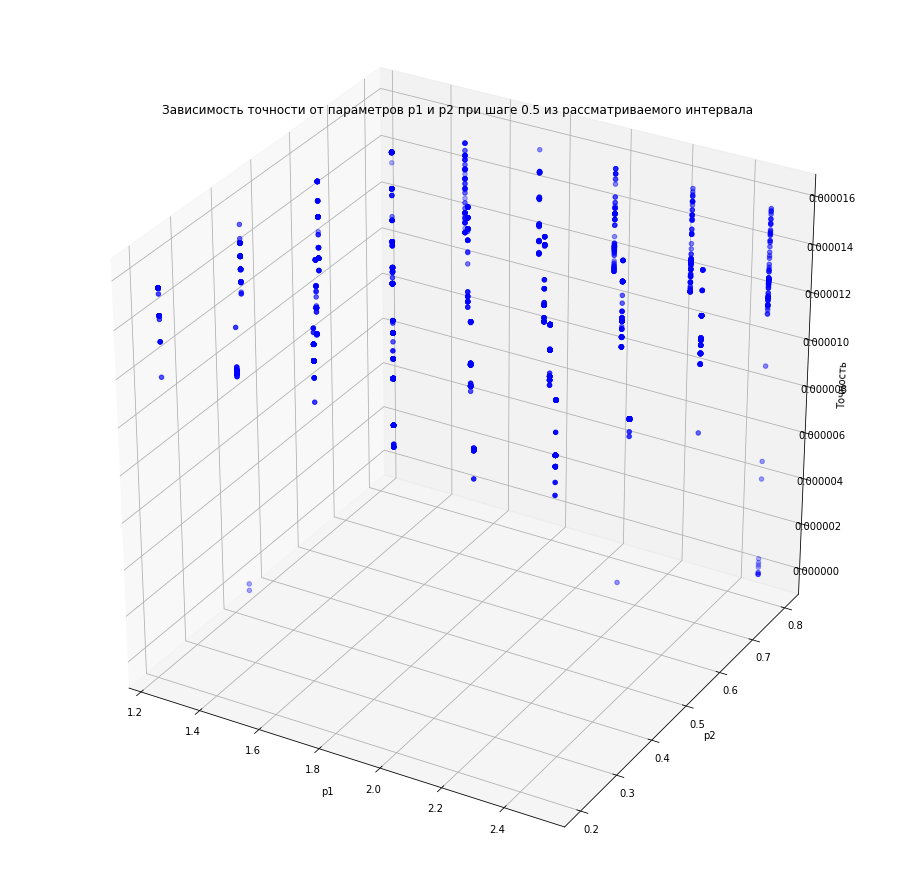

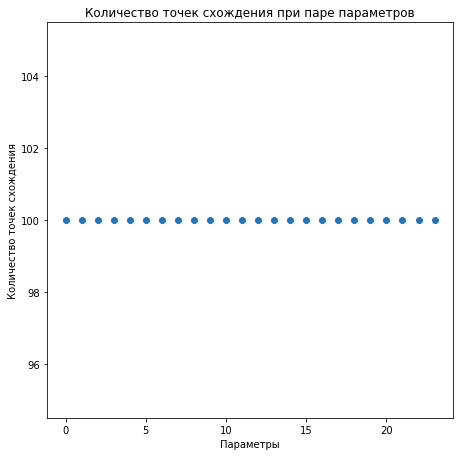

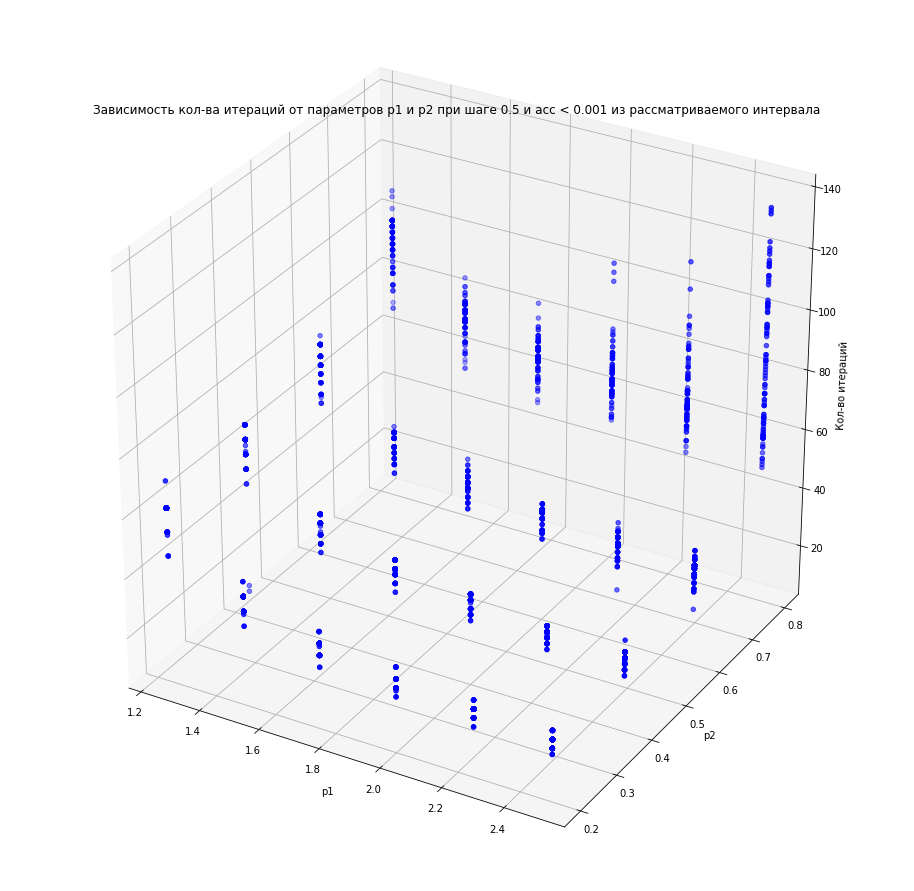

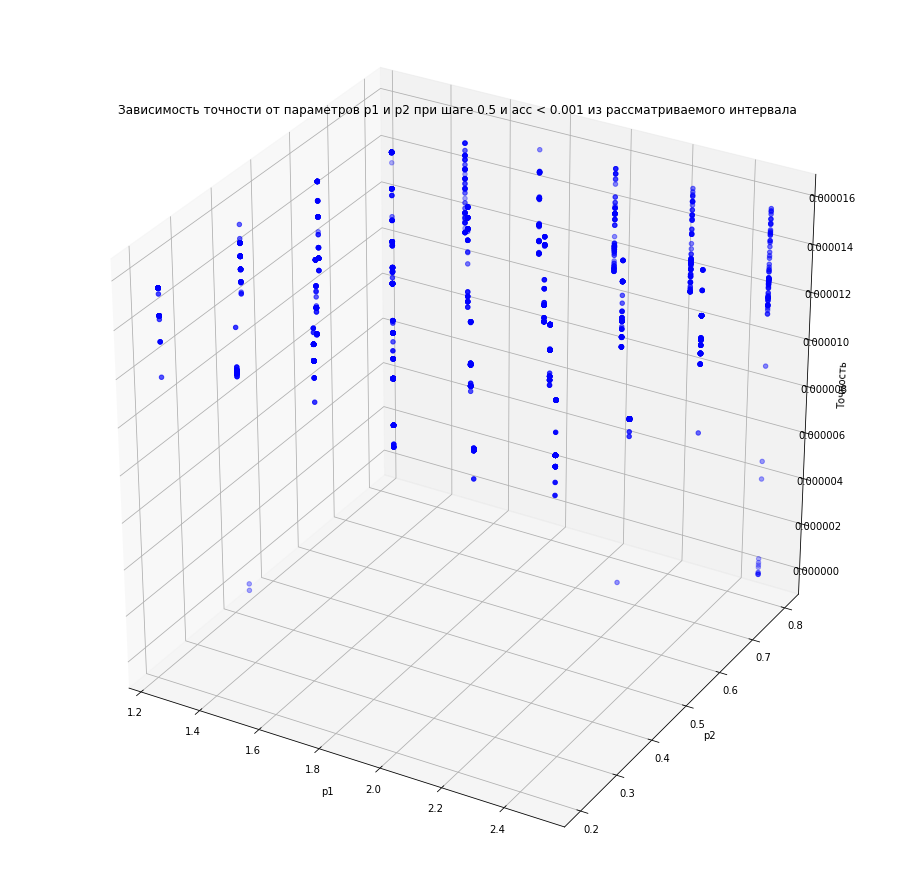

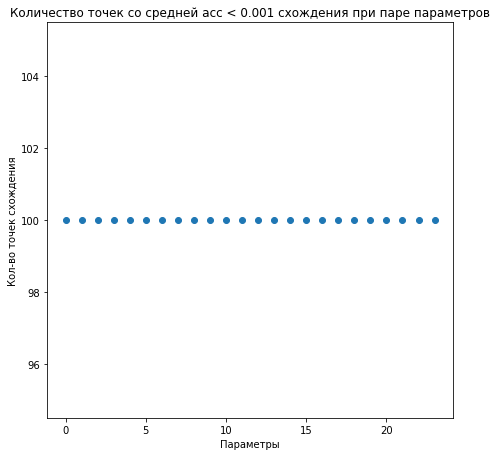

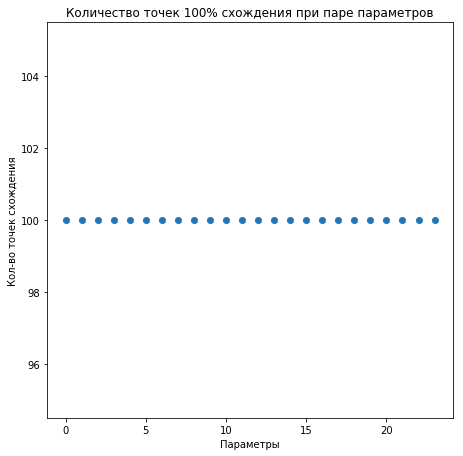

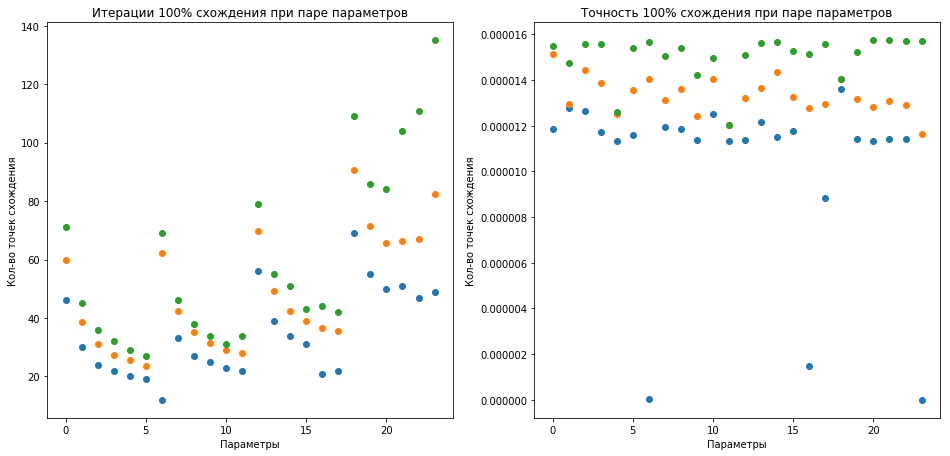

In [14]:
am.adaptivegd_analytics_plots_2dim(train, gc_p, fc_p, op_p)

In [15]:
train_anim = pd.read_csv("../anim_adaptivegd/CHR_anim_adaptivegd.txt", sep = ';',
                    names = ["id", "x1", "x2", "y", "step", "p1", "p2", "beg_step", "iter", "acc"])
print(train_anim.head())

   id         x1        x2             y    step    p1   p2  beg_step  iter  \
0   1  80.930618  0.904579  4.291014e+07  0.5000  1.25  0.2       0.5     1   
1   1  80.930618  0.904579  4.291014e+07  0.1000  1.25  0.2       0.5     2   
2   1  80.930618  0.904579  4.291014e+07  0.0200  1.25  0.2       0.5     3   
3   1  80.930618  0.904579  4.291014e+07  0.0040  1.25  0.2       0.5     4   
4   1  80.930618  0.904579  4.291014e+07  0.0008  1.25  0.2       0.5     5   

            acc  
0  4.291014e+07  
1  4.291014e+07  
2  4.291014e+07  
3  4.291014e+07  
4  4.291014e+07  


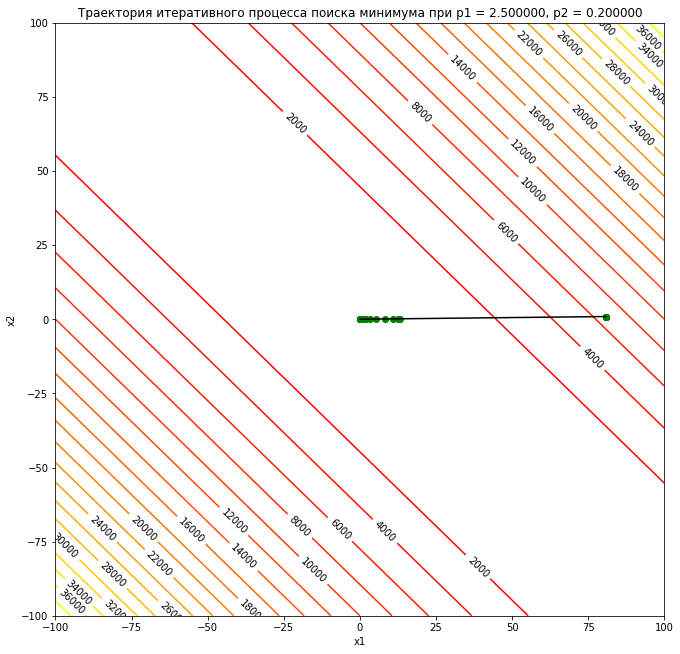

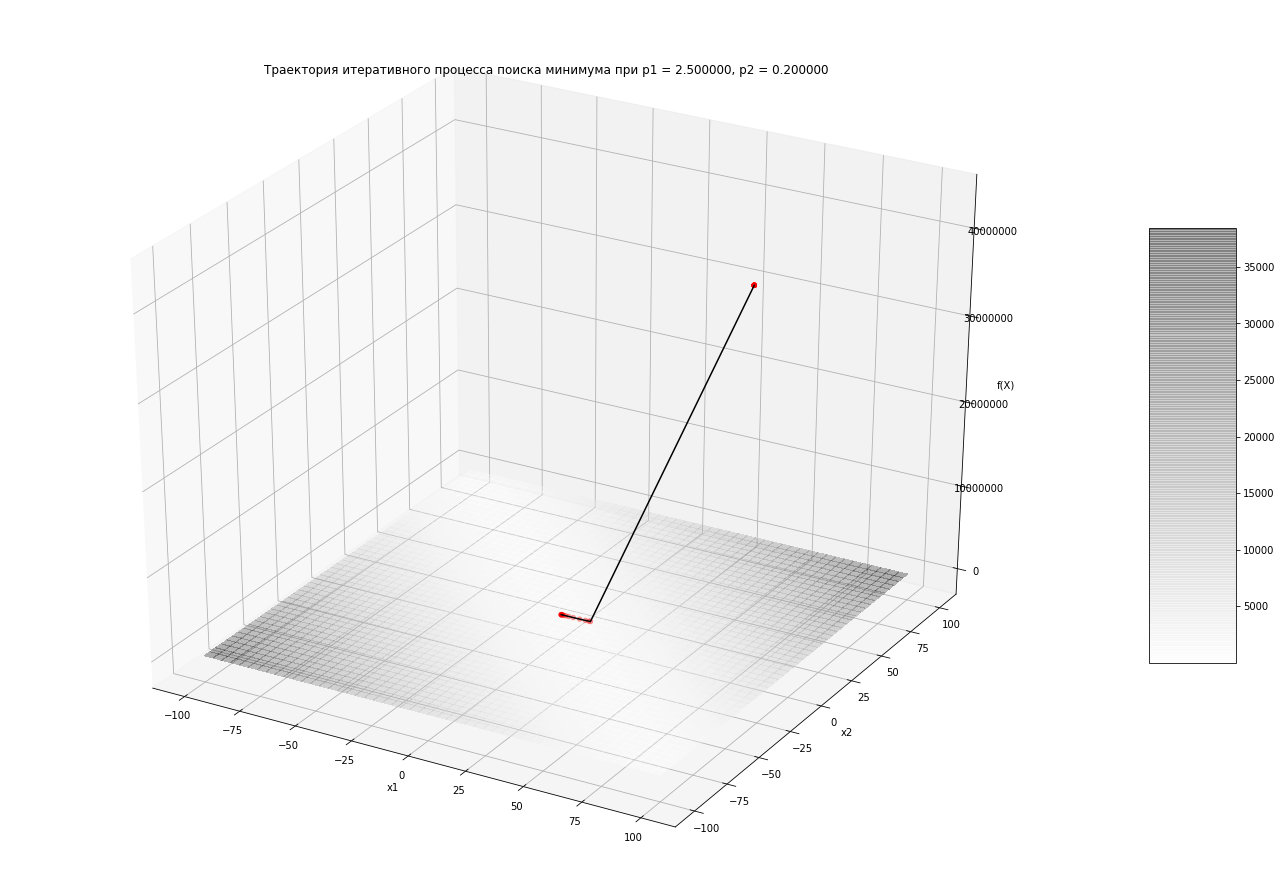

In [16]:
am.path_of_adaptivegd(train_anim, gc_p, op_p, Chung_Reynolds_2_dim_func, [-100,100], 1)

/Users/gtmartem/Documents/dev/.virtualenvs/GRADDESCENT/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Оптимальный p1 = 2.1323969133215557
Оптимальный p2 = 0.29736676275390683


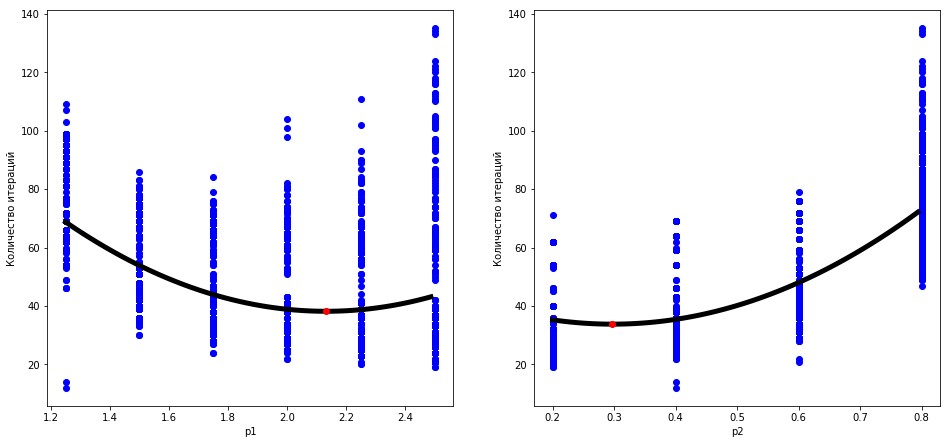

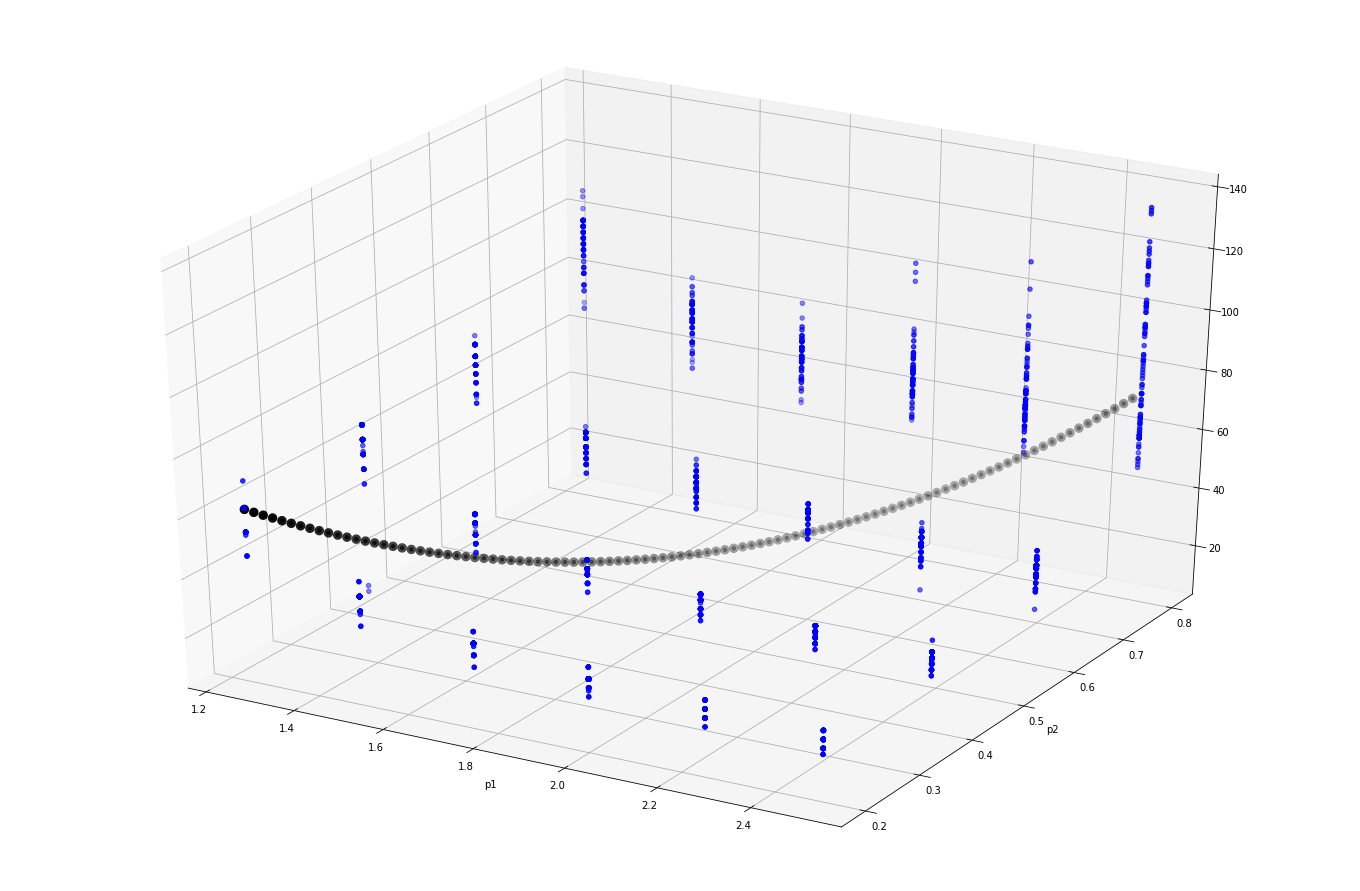

In [3]:
train = train[train.loc[:,"dim"] == 2]
am.iter_params_dep(train)